In [3]:
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import os
import pandas as pd
import seaborn as sns

In [12]:
############## analysis ##################3 
dir_ = "data/WI_data/"
df = pd.read_csv(dir_ + "plan_metrics.csv")

In [13]:
df2 = pd.read_csv(dir_ + "PRES16.csv")
pop = pd.read_csv(dir_ + "population.csv")

In [20]:
list(df)

['election_ATG12_egs',
 'election_ATG12_mms',
 'election_ATG14_egs',
 'election_ATG14_mms',
 'election_GOV12_egs',
 'election_GOV12_mms',
 'election_GOV14_egs',
 'election_GOV14_mms',
 'election_PRES12_egs',
 'election_PRES12_mms',
 'election_PRES16_egs',
 'election_PRES16_mms',
 'election_SEN12_egs',
 'election_SEN12_mms',
 'election_SEN16_egs',
 'election_SEN16_mms',
 'election_SOS14_egs',
 'election_SOS14_mms',
 'nb_cuts',
 'n_vote_dem',
 'total_n_votes',
 'perc_dem_vote']

In [15]:
df['n_vote_dem'] = df2['perc_dem_vote_district_1'] * pop['pop_district_1'] +\
                    df2['perc_dem_vote_district_2'] * pop['pop_district_2']+\
                    df2['perc_dem_vote_district_3'] * pop['pop_district_3']+\
                    df2['perc_dem_vote_district_4'] * pop['pop_district_4']+\
                    df2['perc_dem_vote_district_5'] * pop['pop_district_5']+\
                    df2['perc_dem_vote_district_6'] * pop['pop_district_6']+\
                    df2['perc_dem_vote_district_7'] * pop['pop_district_7']

df['total_n_votes'] = pop['pop_district_1'] +\
                    pop['pop_district_2']+\
                    pop['pop_district_3']+\
                    pop['pop_district_4']+\
                    pop['pop_district_5']+\
                    pop['pop_district_6']+\
                    pop['pop_district_7']+\
                    pop['pop_district_8']

df['perc_dem_vote'] = df['n_vote_dem'] / df['total_n_votes']

In [16]:
df2['dem_seats'] = (df2['perc_dem_vote_district_1'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_2'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_3'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_4'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_5'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_6'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_7'] >= 0.5).astype('int64')+\
                    (df2['perc_dem_vote_district_8'] >= 0.5).astype('int64')

df2['rep_seats'] = 11-df2['dem_seats']
df2['dem_to_rep_ratio'] = df2['dem_seats'] / df2['rep_seats']

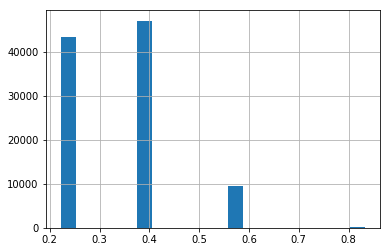

In [17]:
df2['dem_to_rep_ratio'].hist(bins = 20)
# wisconsin is more republican

# Focus on Attorney General 2017 elections in VA

In [21]:
df[['election_PRES16_egs',
#     'election_ATG17_hmss',
     'election_PRES16_mms',
     'nb_cuts',
    'perc_dem_vote',
    'n_vote_dem',
    'total_n_votes']].to_csv(dir_ + "plan_metrics_WI_PRES16.csv")

In [22]:
df = df[['election_PRES16_egs',
         'election_PRES16_mms',
         'nb_cuts',
        'perc_dem_vote']]

# First, plot histograms of each metric

## Efficiency gap

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


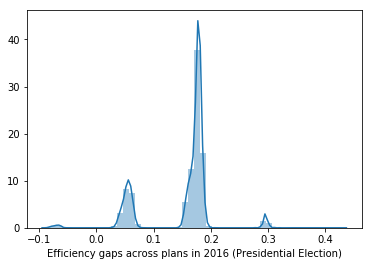

In [23]:
sns.distplot(df['election_PRES16_egs'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Efficiency gaps across plans in 2016 (Presidential Election)'
            )

## Number of seats won by the Dem party

sns.distplot(df['election_ATG17_hmss'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Number of seats won by the Dem across plans in 2017 (Attorney General Election)'
            )

## Mean-Median

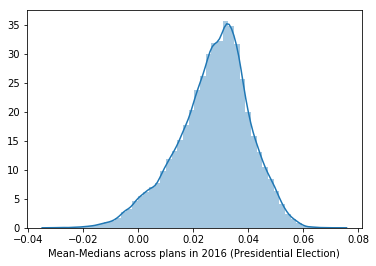

In [24]:
sns.distplot(df['election_PRES16_mms'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Mean-Medians across plans in 2016 (Presidential Election)')

## Number of cuts

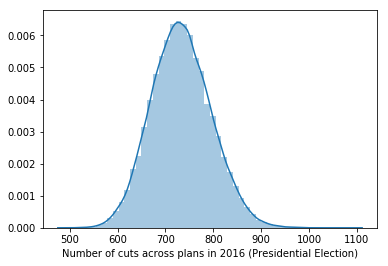

In [25]:
sns.distplot(df['nb_cuts'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Number of cuts across plans in 2016 (Presidential Election)')

## Percentage of votes for Democrats

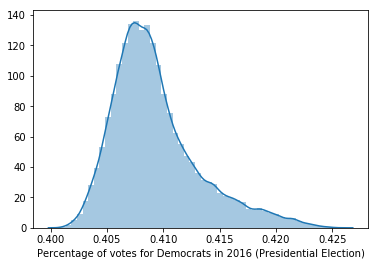

In [26]:
sns.distplot(df['perc_dem_vote'],
             rug=False, 
             hist=True,
             kde=True,
             axlabel = 'Percentage of votes for Democrats in 2016 (Presidential Election)')

---
# Plot 2 metrics against each other


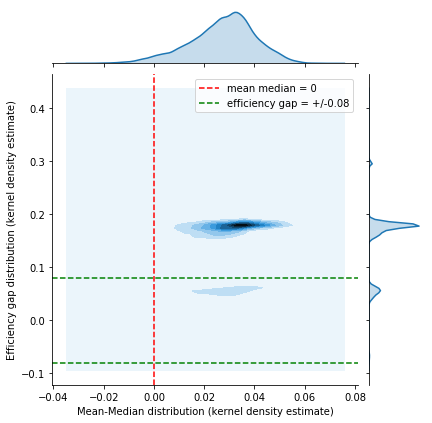

In [34]:
a = sns.jointplot(x="election_PRES16_mms", y="election_PRES16_egs", data=df,
             kind="kde")
a.ax_joint.axvline(0, color='r', linestyle='--', label = 'mean median = 0')
a.ax_joint.axhline(0.08, color='g', linestyle='--', label = 'efficiency gap = +/-0.08')
a.ax_joint.axhline(-0.08, color='g', linestyle='--')
a.ax_joint.set_xlabel("Mean-Median distribution (kernel density estimate)")
a.ax_joint.set_ylabel("Efficiency gap distribution (kernel density estimate)")
a.ax_joint.legend()

a = sns.jointplot(x="election_ATG17_hmss", y="election_ATG17_egs", data=df,
             kind="kde")
a.ax_joint.axhline(0.08, color='r', linestyle='--', label = 'efficiency gap = 0.08')
a.ax_joint.axhline(-0.08, color='r', linestyle='--', label = 'efficiency gap = -0.08')
a.ax_joint.set_xlabel("Distribution of # of seats won by the Dem party (kernel density estimate)")
a.ax_joint.set_ylabel("Efficiency gap distribution (kernel density estimate)")
a.ax_joint.legend()

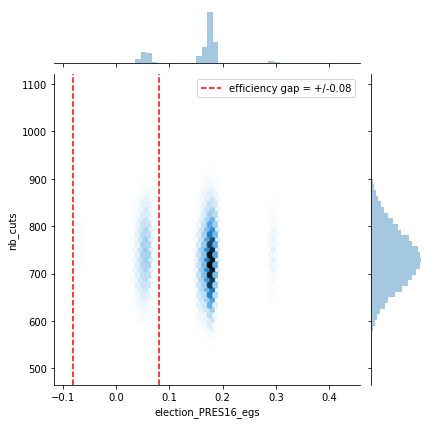

In [28]:
a = sns.jointplot(x="election_PRES16_egs", y="nb_cuts", data=df,
             kind="hex")
a.ax_joint.axvline(0.08, color='r', linestyle='--', label = 'efficiency gap = +/-0.08')
a.ax_joint.axvline(-0.08, color='r', linestyle='--')
a.ax_joint.legend()

a = sns.jointplot(x="election_ATG17_mms", y="election_ATG17_hmss", data=df,
             kind="kde")
a.ax_joint.axvline(0, color='r', linestyle='--', label = 'mean median = 0')
a.ax_joint.set_xlabel("Mean-Median distribution (kernel density estimate)")
a.ax_joint.set_ylabel("Distribution of # of seats won by the Dem party (kernel density estimate)")
a.ax_joint.legend()

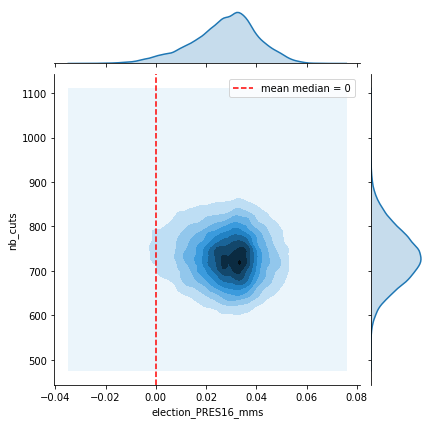

In [29]:
a = sns.jointplot(x="election_PRES16_mms", y="nb_cuts", data=df,
             kind="kde")
a.ax_joint.axvline(0, color='r', linestyle='--', label = 'mean median = 0')
a.ax_joint.legend()

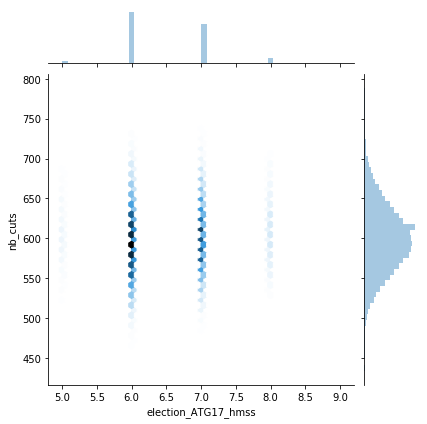

In [18]:
sns.jointplot(x="election_ATG17_hmss", y="nb_cuts", data=df,
             kind="hex")

sns.jointplot(x="perc_dem_vote", y="election_ATG17_hmss", data=df,
             kind="hex")

sns.jointplot(x="perc_dem_vote", y="election_ATG17_hmss", data=df,
             kind="kde")

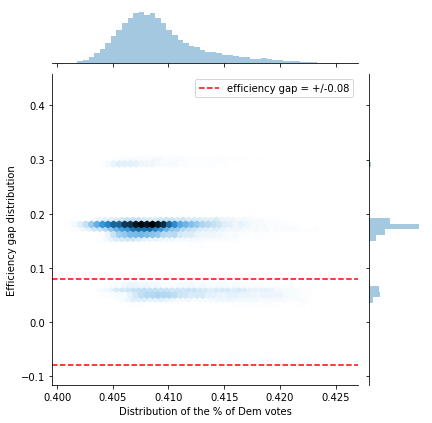

In [31]:
a = sns.jointplot(x="perc_dem_vote", y="election_PRES16_egs", data=df,
             kind="hex")
a.ax_joint.axhline(0.08, color='r', linestyle='--', label = 'efficiency gap = +/-0.08')
a.ax_joint.axhline(-0.08, color='r', linestyle='--')
a.ax_joint.set_xlabel("Distribution of the % of Dem votes")
a.ax_joint.set_ylabel("Efficiency gap distribution")
a.ax_joint.legend()

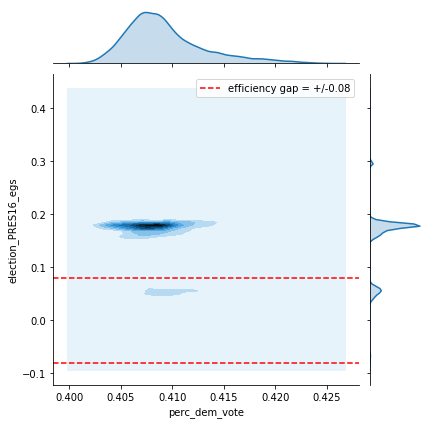

In [35]:
a= sns.jointplot(x="perc_dem_vote", y="election_PRES16_egs", data=df,
             kind="kde")
a.ax_joint.axhline(0.08, color='r', linestyle='--', label = 'efficiency gap = +/-0.08')
a.ax_joint.axhline(-0.08, color='r', linestyle='--')
a.ax_joint.legend()

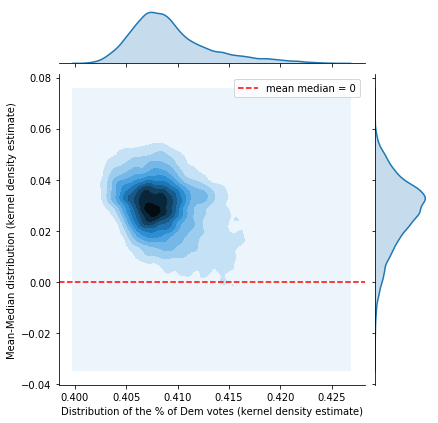

In [36]:
a = sns.jointplot(x="perc_dem_vote", y="election_PRES16_mms", data=df,
             kind="kde")
a.ax_joint.axhline(0, color='r', linestyle='--', label = 'mean median = 0')
a.ax_joint.set_ylabel("Mean-Median distribution (kernel density estimate)")
a.ax_joint.set_xlabel("Distribution of the % of Dem votes (kernel density estimate)")
a.ax_joint.legend()

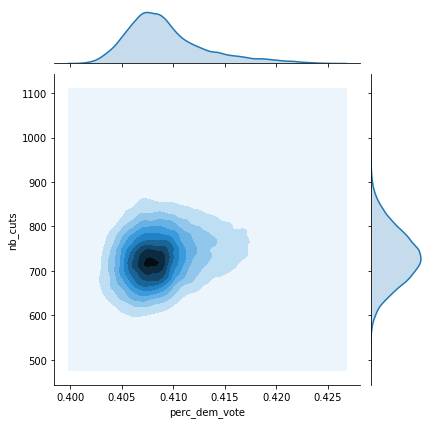

In [33]:
sns.jointplot(x="perc_dem_vote", y="nb_cuts", data=df,
             kind="kde")

# pairwise plots

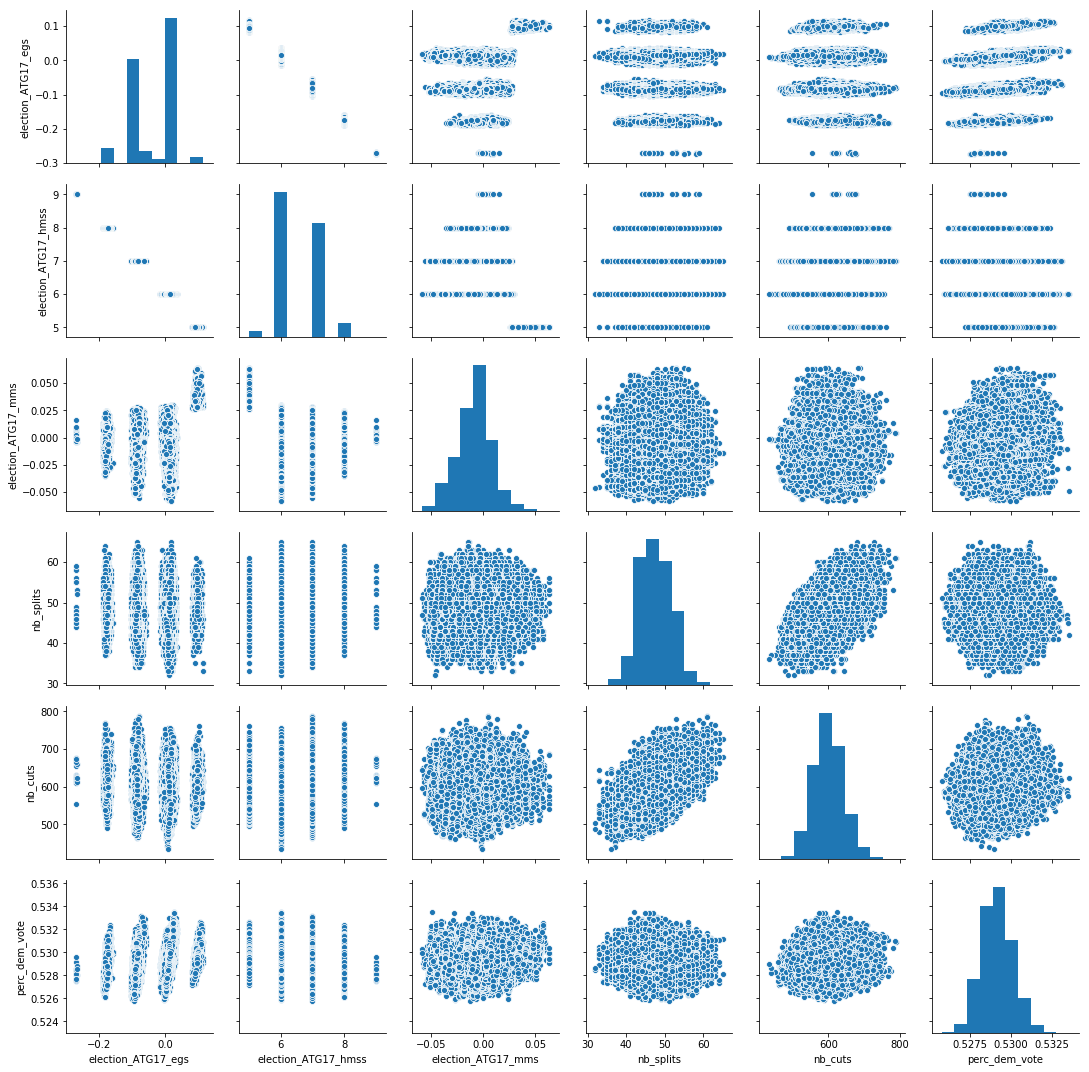

In [58]:
sns.pairplot(df)

# Visualize seats-votes curve

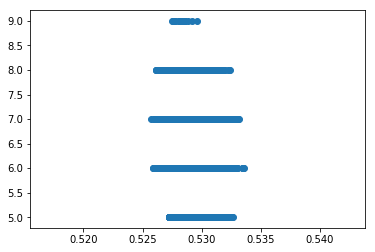

In [52]:
plt.scatter(df['perc_dem_vote'], df['election_ATG17_hmss'] )

# Plot metrics based on selection other metrics

In [55]:
def selection_plot(d, # data frame
                   x, # x axis variable
                   y, # y axis variable
                   filter_x_min = False,
                   filter_x_max = False,
                   filter_y_min = False,
                   filter_y_max = False):
    # filter
    if filter_x_min:
        d = d.loc[d[x] >= filter_x_min]
    if filter_x_max:
        d = d.loc[d[x] <= filter_x_max]
    if filter_y_min:
        d = d.loc[d[x] >= filter_x_min]
    if filter_y_max:
        d = d.loc[d[y] <= filter_y_max]
    
    # plot
    a = sns.jointplot(x=x, y=y, data=df,
             kind="kde")
    
    if x == 'election_ATG17_mms':
        a.ax_joint.axvline(0, color='r', linestyle='--')        
        
    elif y == 'election_ATG17_mms':
        a.ax_joint.axhline(0, color='r', linestyle='--')
    elif x == 'election_ATG17_egs':
        a.ax_joint.axvline(0.08, color='r', linestyle='--')
        a.ax_joint.axvline(-0.08, color='r', linestyle='--')
    elif y == 'election_ATG17_egs':
        a.ax_joint.axhline(0.08, color='r', linestyle='--')
        a.ax_joint.axhline(-0.08, color='r', linestyle='--')
    return(d)

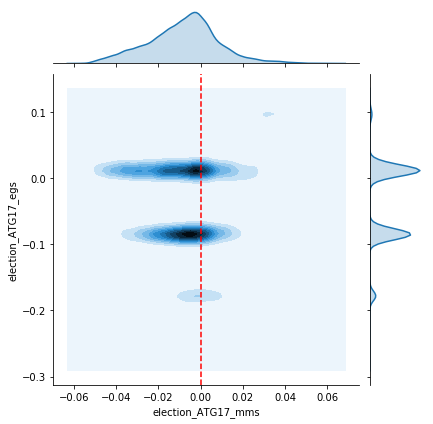

In [56]:
d1 = selection_plot(d = df,
                   x = 'election_ATG17_mms',
                   y = 'election_ATG17_egs',
                   filter_x_min = -0.025,
                   filter_x_max = 0.025,
                   filter_y_min = False,
                   filter_y_max = False)